In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Sklearn
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report #gives whole info about matrices
from sklearn.metrics import confusion_matrix #gives diff between actual and predict
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

#NLP packages
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words

#visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

print('imported')

imported


In [4]:
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [5]:
#loading dataset
df = pd.read_csv('dataset/phishing_site_urls.csv')
df.head(5)

URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad

In [6]:
df.shape

(549346, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [8]:
df.isnull().any()

URL      False
Label    False
dtype: bool

In [9]:
label_counts = pd.DataFrame(df.Label.value_counts())
label_counts

count
Label        
good   392924
bad    156422

In [10]:
# sns.barplot(label_counts.index,label_counts.Label)

In [11]:
# RegexpTokenizer
#It is used in NLP for dividing paragraph into sentences and sentences to words

tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df['URL'][0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
# this will be pull letter which matches to expression
tokenizer.tokenize(df['URL'][0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
import time
print("Getting words tokenized...")
t0=time.time()
df['text_tokenized']=df.URL.map(lambda t: tokenizer.tokenize(t))
t1=time.time() -t0
print(f"Time taken {round(t1,2)} seconds")

Getting words tokenized...
Time taken 2.2 seconds


In [14]:
df.sample(5)

URL Label  \
454892  ultimate-guitar.com/reviews/compact_discs/bays...  good   
309590  corporationwiki.com/Texas/Galveston/insurance-...  good   
245250                         tamilcuisine.blogspot.com/  good   
322538            enotes.com/topic/United_States_Congress  good   
13011   us.battle.net.ok.yyweb.asia/login/en/login.htm...   bad   

                                           text_tokenized  
454892  [ultimate, guitar, com, reviews, compact, disc...  
309590  [corporationwiki, com, Texas, Galveston, insur...  
245250                      [tamilcuisine, blogspot, com]  
322538     [enotes, com, topic, United, States, Congress]  
13011   [us, battle, net, ok, yyweb, asia, login, en, ...

In [15]:
# Snowball is a small string processing language, gives root words
# root words means ex. University,universal,universestar here universe is root word
# and also removes of,and,is,was,are,I
#snow ball is package for give root word for multiple language
stemmer = SnowballStemmer("english") 

In [16]:
print("Getting words stemmed....")
t2=time.time()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t3 = time.time()-t2
print(f"Time taken {round(t3,2)} seconds")

Getting words stemmed....
Time taken 31.72 seconds


In [17]:
df.sample(5)

URL Label  \
279395  angelfire.com/sk/syukhtun/everett.html  good   
294566            boswellsisters.blogspot.com/  good   
88271               web.tiscali.it/midirunner/  good   
492766                        clientalalaxp.mn   bad   
534866                   banyapike.net/d0tuudc   bad   

                                       text_tokenized  \
279395  [angelfire, com, sk, syukhtun, everett, html]   
294566                [boswellsisters, blogspot, com]   
88271                  [web, tiscali, it, midirunner]   
492766                            [clientalalaxp, mn]   
534866                     [banyapike, net, d, tuudc]   

                                        text_stemmed  
279395  [angelfir, com, sk, syukhtun, everett, html]  
294566                  [boswellsist, blogspot, com]  
88271                   [web, tiscali, it, midirunn]  
492766                           [clientalalaxp, mn]  
534866                     [banyapik, net, d, tuudc]

In [18]:
#joining stemmed words
print("Getting joining words")
t4=time.time()
df['text_from_url'] = df['text_stemmed'].map(lambda i:' '.join(i))
t5=time.time()-t4
print(f"Time taken {round(t5,2)} seconds")

Getting joining words
Time taken 0.19 seconds


In [19]:
df.sample(5)

URL Label  \
472345                    youtube.com/watch?v=D963vqx88Xg  good   
464598  wikimapia.org/61280/The-Allan-Memorial-Institu...  good   
388988            mickmusicpage.net/eng/01_bozak/pack.htm  good   
232627                                         qcolp.com/  good   
42485   oculuskirov.ru/wp-content/plugins/wp_comm/3805...   bad   

                                           text_tokenized  \
472345               [youtube, com, watch, v, D, vqx, Xg]   
464598  [wikimapia, org, The, Allan, Memorial, Institu...   
388988        [mickmusicpage, net, eng, bozak, pack, htm]   
232627                                       [qcolp, com]   
42485   [oculuskirov, ru, wp, content, plugins, wp, co...   

                                             text_stemmed  \
472345                [youtub, com, watch, v, d, vqx, xg]   
464598  [wikimapia, org, the, allan, memori, institut,...   
388988         [mickmusicpag, net, eng, bozak, pack, htm]   
232627                                       [qcolp, com]   
42485   [oculuskirov, ru, wp, content, plugin, wp, com...   

                                            text_from_url  
472345                        youtub com watch v d vqx xg  
464598  wikimapia org the allan memori institut pavili...  
388988                mickmusicpag net eng bozak pack htm  
232627                                          qcolp com  
42485      oculuskirov ru wp content plugin wp comm login

In [20]:
#now we are going to visualize good and bad urls frequent keywords using wordcloud
good_sites = df[df.Label=="good"]
bad_sites = df[df.Label=="bad"]

In [21]:
good_sites.head()

URL Label  \
18231  esxcc.com/js/index.htm?us.battle.net/noghn/en/...  good   
18232  wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...  good   
18233  'www.institutocgr.coo/web/media/syqvem/dk-óij...  good   
18234                  Yìê
koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í  good   
18236  ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...  good   

                                          text_tokenized  \
18231  [esxcc, com, js, index, htm, us, battle, net, ...   
18232  [www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...   
18233  [www, institutocgr, coo, web, media, syqvem, d...   
18234                                  [Y, ko, D, l, qt]   
18236  [ruta, fm, com, images, AS, Vies, i, cf, b, vc...   

                                            text_stemmed  \
18231  [esxcc, com, js, index, htm, us, battl, net, n...   
18232  [www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...   
18233  [www, institutocgr, coo, web, media, syqvem, d...   
18234                                  [y, ko, d, l, qt]   
18236  [ruta, fm, com, imag, as, vie, i, cf, b, vc, f...   

                                           text_from_url  
18231  esxcc com js index htm us battl net noghn en r...  
18232  www eira nvinip nch wv ydah ye u rt u g m i xz...  
18233  www institutocgr coo web media syqvem dk ij r ...  
18234                                        y ko d l qt  
18236  ruta fm com imag as vie i cf b vc f d b g sd v...

In [22]:
bad_sites.head()

URL Label  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad   
3  mail.printakid.com/www.online.americanexpress....   bad   
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad   

                                      text_tokenized  \
0  [nobell, it, ffb, d, dca, cce, f, login, SkyPe...   
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...   
2  [serviciosbys, com, paypal, cgi, bin, get, int...   
3  [mail, printakid, com, www, online, americanex...   
4  [thewhiskeydregs, com, wp, content, themes, wi...   

                                        text_stemmed  \
0  [nobel, it, ffb, d, dca, cce, f, login, skype,...   
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...   
2  [serviciosbi, com, paypal, cgi, bin, get, into...   
3  [mail, printakid, com, www, onlin, americanexp...   
4  [thewhiskeydreg, com, wp, content, theme, wide...   

                                       text_from_url  
0  nobel it ffb d dca cce f login skype com en cg...  
1  www dghjdgf com paypal co uk cycgi bin webscrc...  
2  serviciosbi com paypal cgi bin get into herf s...  
3  mail printakid com www onlin americanexpress c...  
4  thewhiskeydreg com wp content theme widescreen...

In [23]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [24]:
data = good_sites.text_from_url
data.reset_index(drop=True, inplace=True)

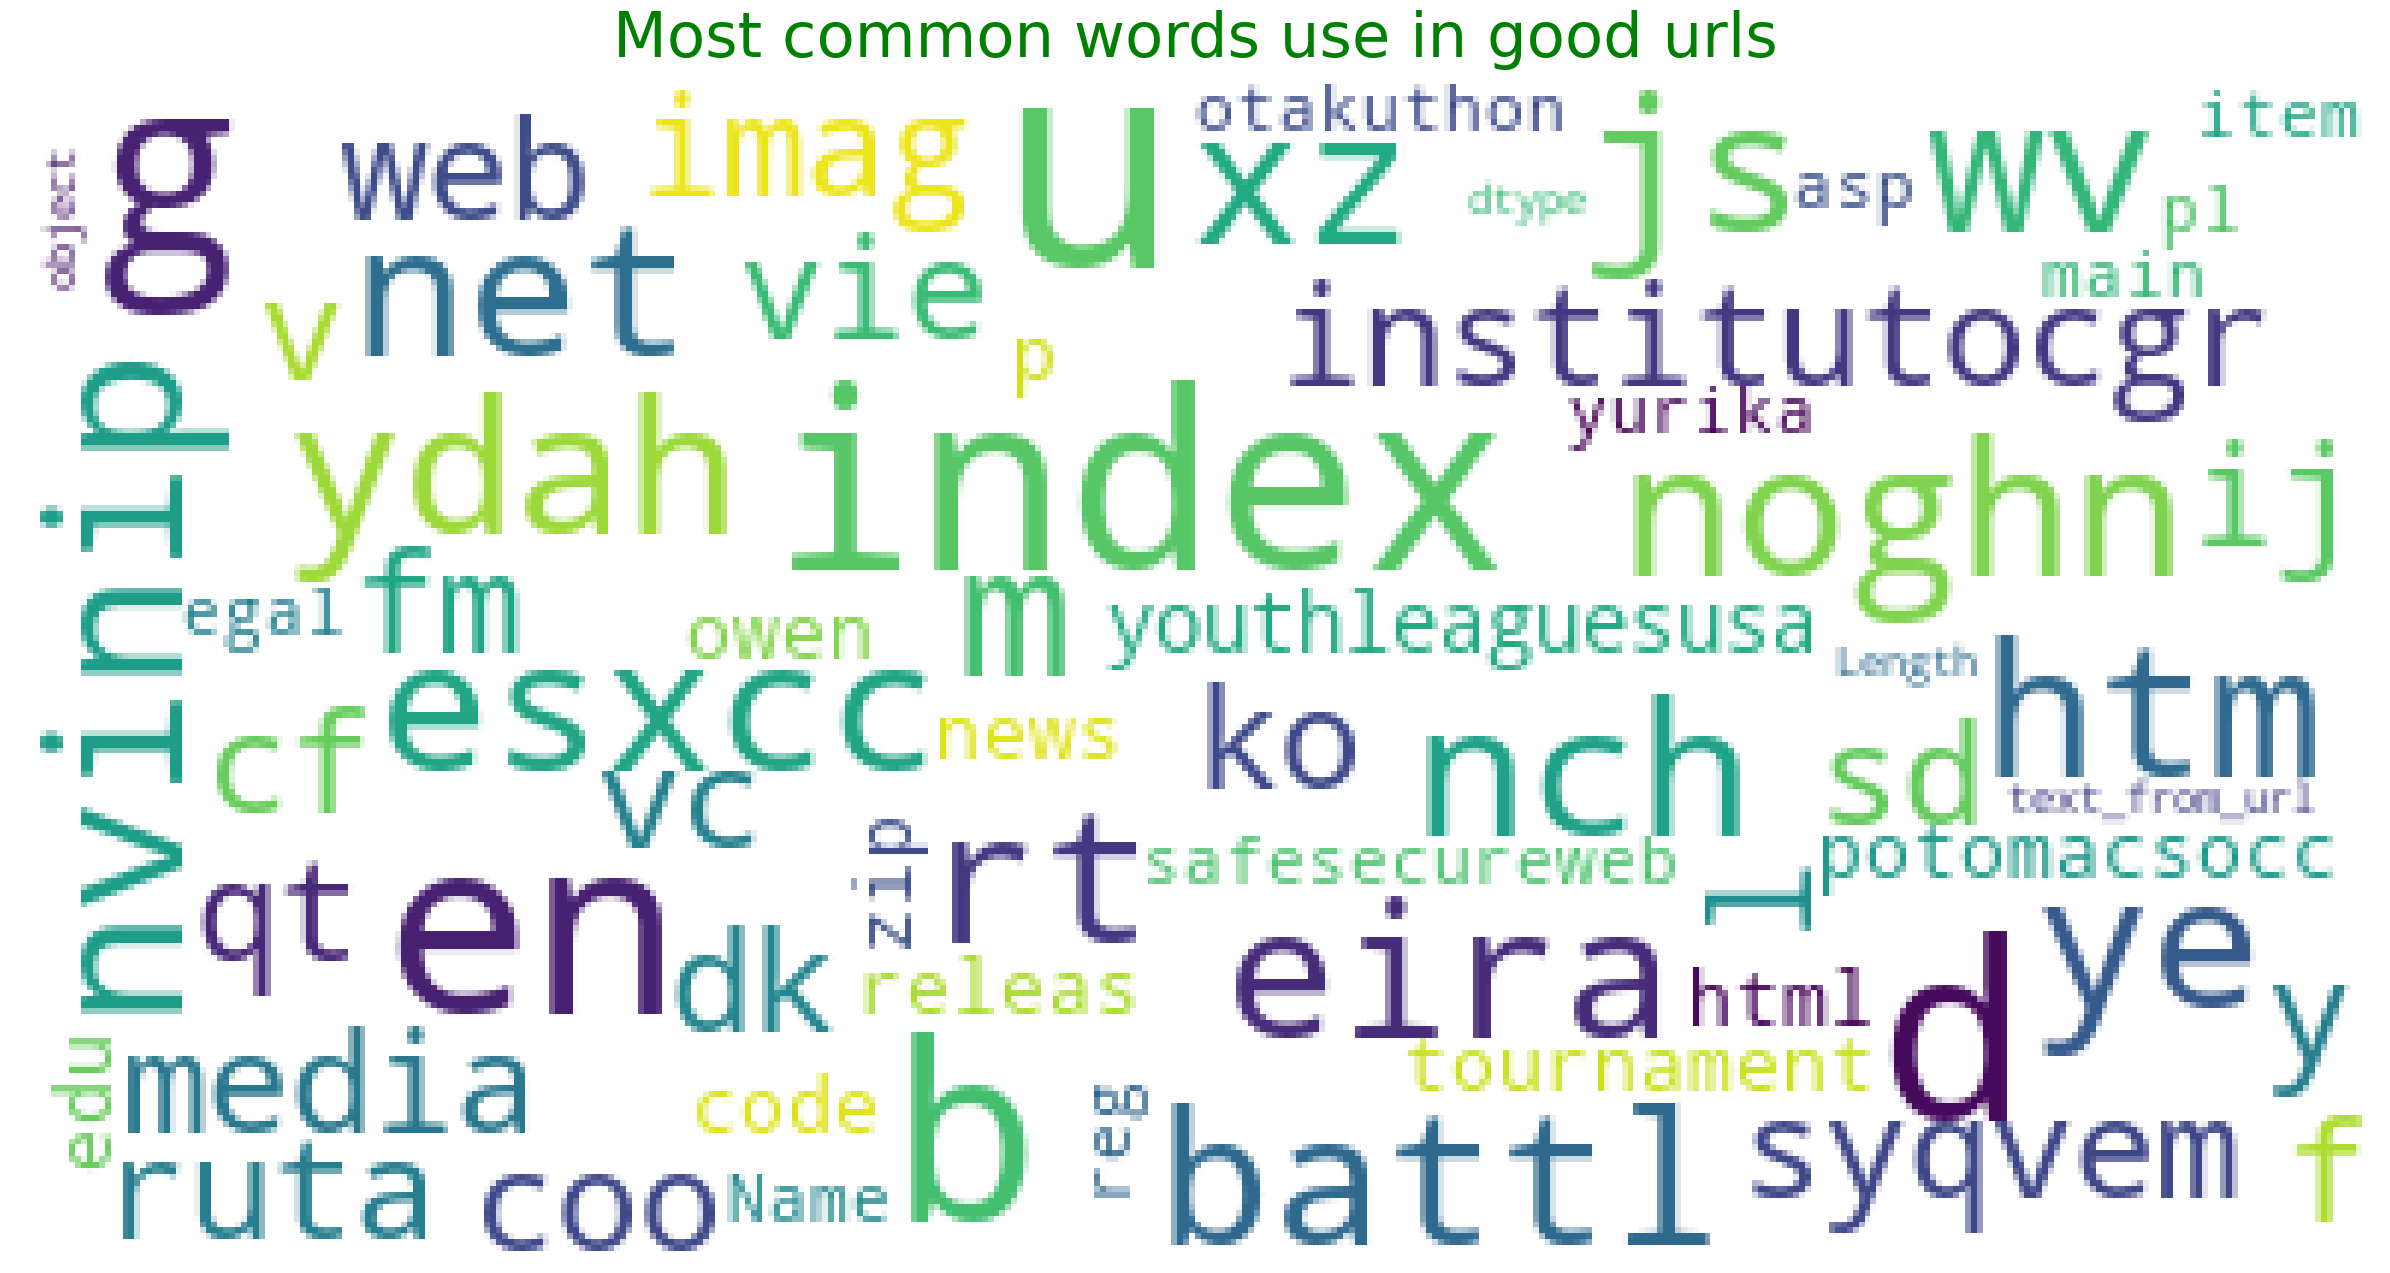

In [25]:
common_text = str(data)
plot_wordcloud(common_text, max_words=4000, max_font_size=50, 
               title = 'Most common words use in good urls', title_size=45)

In [26]:
data = bad_sites.text_from_url
data.reset_index(drop=True, inplace=True)

In [27]:

common_text = str(data)
plot_wordcloud(common_text, max_words=4000, max_font_size=50, 
               title = 'Most common words use in bad urls', title_size=45)

In [28]:
#Creating Model
df.head(2)

URL Label  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad   

                                      text_tokenized  \
0  [nobell, it, ffb, d, dca, cce, f, login, SkyPe...   
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...   

                                        text_stemmed  \
0  [nobel, it, ffb, d, dca, cce, f, login, skype,...   
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...   

                                       text_from_url  
0  nobel it ffb d dca cce f login skype com en cg...  
1  www dghjdgf com paypal co uk cycgi bin webscrc...

In [29]:
#here our words are mostly texts we have to convert it into numbers for that we have to convert it using
# count vectorizer - Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()

In [30]:
# help(cv)

In [31]:
feature = cv.fit_transform(df.text_from_url)
feature

<549346x350837 sparse matrix of type '<class 'numpy.int64'>'
	with 3676066 stored elements in Compressed Sparse Row format>

In [32]:
#now the above feature is stored as compressed sparse matrix , to see it,
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
#training model
X_train,X_test,y_train,y_test = train_test_split(feature,df.Label)

In [34]:

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
lr.score(X_test,y_test)

0.9637315508566519

In [36]:
#Logistic gives 96% accuraccy
print("Testing Accuracy : ",lr.score(X_test,y_test))
print("Training Accuracy : ",lr.score(X_train,y_train))

Testing Accuracy :  0.9637315508566519
Training Accuracy :  0.978318434791473


CONFUSION MATRIX


<Axes: >

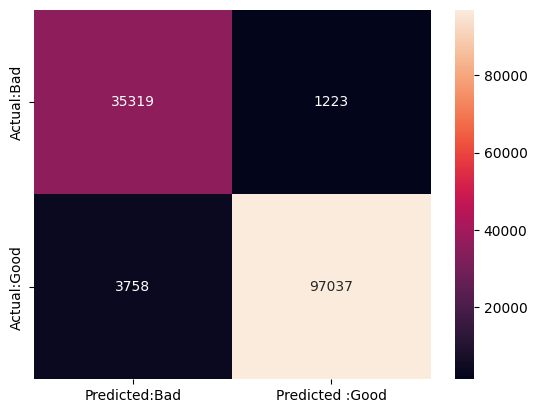

In [37]:
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test), y_test),
                            columns = ['Predicted:Bad', 'Predicted :Good'],
                            index = ['Actual:Bad','Actual:Good'])
print("CONFUSION MATRIX")
sns.heatmap(con_mat,annot = True,fmt='d')

In [38]:
print("CLASSIFICATION REPORT")
report = classification_report(lr.predict(X_test), y_test,
                            target_names =['Bad','Good'])
print(report)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36542
        Good       0.99      0.96      0.97    100795

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337



In [39]:
#pipeline is for automating model training

pipeline_ls = make_pipeline(
    CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'),
    LogisticRegression()
)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(df.URL,df.Label,test_size=0.2)

In [41]:
pipeline_ls.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [42]:
pipeline_ls.score(X_test,y_test)

0.9665513789023391

Training Accuracy : 0.979962500796403
Testing Accuracy : 0.9665513789023391

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     29572
        Good       0.99      0.97      0.98     80298

    accuracy                           0.97    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.97      0.97    109870


CONFUSION MATRIX


<Axes: >

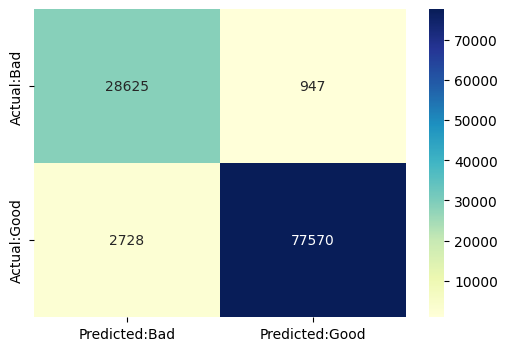

In [43]:
print('Training Accuracy :',pipeline_ls.score(X_train,y_train))
print('Testing Accuracy :',pipeline_ls.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [44]:
# import pickle #to export model
# pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [45]:
# loaded_model = pickle.load(open('phishing.pkl', 'rb'))
# result = loaded_model.score(X_test,y_test)
# print(result)

In [46]:
# predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
# predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
# loaded_model = pickle.load(open('phishing.pkl', 'rb'))
# result = loaded_model.predict(predict_bad)
# result2 = loaded_model.predict(predict_good)
# print(result)
# print("_"*30)
# print(result2)

In [47]:
# predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php']
# predict_good = ['www.google.com/']
# loaded_model = pickle.load(open('phishing.pkl', 'rb'))
# result = loaded_model.predict(predict_bad)
# result

In [48]:
#Random Forest
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=2)
# rf.fit(X_train,y_train)
pipeline_rf = make_pipeline(
    CountVectorizer(tokenizer=RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'),
    RandomForestClassifier(n_estimators=5)
)


In [49]:
pipeline_rf.fit(X_train, y_train)
print("Testing Accuracy:", pipeline_rf.score(X_test, y_test))

Testing Accuracy: 0.9629107126604168


In [50]:
pipeline_rf.score(X_test,y_test)

0.9629107126604168

In [51]:
#Random forest 97% accuraccy
print("Testing Accuracy : ",pipeline_rf.score(X_test,y_test))
print("Training Accuracy : ",pipeline_rf.score(X_train,y_train))

Testing Accuracy :  0.9629107126604168
Training Accuracy :  0.9952784679937016


In [52]:
con_mat = pd.DataFrame(confusion_matrix(pipeline_rf.predict(X_test), y_test),
                            columns = ['Predicted:Bad', 'Predicted :Good'],
                            index = ['Actual:Bad','Actual:Good'])
print("CONFUSION MATRIX")
sns.heatmap(con_mat,annot = True,fmt='d')

CONFUSION MATRIX


<Axes: >

In [53]:
print("Random forest REPORT")
report = classification_report(pipeline_rf.predict(X_test), y_test,
                            target_names =['Bad','Good'])
print(report)

Random forest REPORT
              precision    recall  f1-score   support

         Bad       0.94      0.93      0.94     31456
        Good       0.97      0.97      0.97     78414

    accuracy                           0.96    109870
   macro avg       0.96      0.95      0.95    109870
weighted avg       0.96      0.96      0.96    109870



In [54]:
import pickle #to export model
pickle.dump(pipeline_rf,open('phishing.pkl','wb'))

In [55]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.9629107126604168


In [57]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['https://chat.openai.com/c/869f2e53-a75c-4067-bbaa-77697507150a','youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("_"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
______________________________
['bad' 'good' 'good' 'good' 'good']
